# Problem Statement

In this task we will predict the percentage of marks that a student is expected to score based upon the number of ours he/she has studied.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import cutecharts.charts as ctc

In [2]:
#reading the data
data = pd.read_csv("http://bit.ly/w-data")

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Visualizing the data

In [3]:
chart = ctc.Scatter("Hours vs Scores",width='500px',height='600px')
chart.set_options(x_label="Hours",y_label="Percentage",colors=['#1EAFAE'],is_show_line=False,dot_size=1)
chart.add_series("Hours",[(z[0],z[1]) for z in zip(data['Hours'],data['Scores'])])
chart.render_notebook()

In [4]:
x = data.drop('Scores',axis='columns')
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [5]:
y = data.Scores
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [6]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [7]:
#Training the data
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


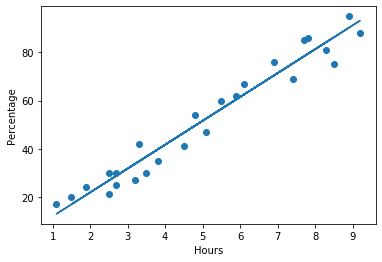

In [8]:
l = reg.coef_*x+reg.intercept_

plt.scatter(x, y)
plt.plot(x, l)
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

In [9]:
print(x_test)
pred = reg.predict(x_test) 
pred

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


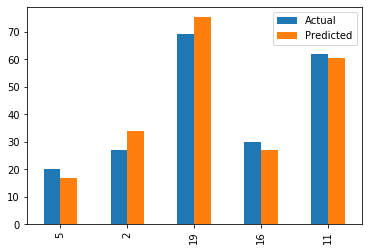

In [11]:
df.plot(kind='bar',label='Actual')

In [12]:
chart1 = ctc.Line("Actuall vs Predicted",width='500px',height='600px')
chart1.set_options(labels=list(y_test),x_label="Hours",y_label="Percentage")
chart1.add_series("Actual",list(y_test))
chart1.add_series("Predicted",list(pred))
chart1.render_notebook()

# Predicting the score

In [13]:
def predict_p(Hours):
    s = np.zeros(len(x.columns))
    s[0]=Hours
    return reg.predict([s])[0]

In [14]:
hrs = float(input())
print("No. of Hours = {}".format(hrs))
print("Predicted Percentage = {}".format(predict_p(hrs)))

9.25
No. of Hours = 9.25
Predicted Percentage = 93.69173248737538


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pred)) 

Mean Absolute Error: 4.183859899002975
